In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### 第三方库版本号

In [2]:
print('geopandas的版本号：{}'.format(gpd.__version__))
import fuzzywuzzy
print('fuzzywuzzy的版本号：{}'.format(fuzzywuzzy.__version__))

geopandas的版本号：0.6.1
fuzzywuzzy的版本号：0.18.0


### 读取事故数据

In [3]:
df = pd.read_excel(r'D:\paper\safety\data\max_accident_data\accident_type.xlsx')
data_area = df.copy().drop('Unnamed: 6',axis =1)
data_area.columns = ['time','province','city','accident','death','injury']
data_area.head()

,time,province,city,accident,death,injury
0,2005-01-05,山西,运城市平陆县境内平风线,翻车,12.0,12.0
1,2005-01-06,福建,莆田市同三线高速公路莆田灵川路段,车辆失控,28.0,19.0
2,2005-01-11,山西,临汾市襄汾县京安村襄浏花炮厂装配车间,爆炸,25.0,10.0
3,2005-01-12,河南,洛阳市宜阳县城关乡乔岩直井煤矿,瓦斯燃烧,10.0,17.0
4,2005-01-16,重庆,南川区南城街道办事处云华煤业有限公司,煤与瓦斯突出,12.0,NaN


### 读取中国版图数据

In [4]:
china_spatial = gpd.GeoDataFrame.from_file('chinadata.json')
china_spatial

,name,centerlng,centerlat,geometry
0,安徽省,117.2260,31.8257,"POLYGON ((119.62594 31.13353, 119.64401 31.114..."
1,北京市,116.4120,40.1844,"POLYGON ((117.38359 40.22566, 117.37170 40.216..."
2,福建省,117.9810,26.0783,"MULTIPOLYGON (((118.25399 24.44654, 118.27072 ..."
3,甘肃省,100.6120,37.8776,"POLYGON ((104.29087 37.43066, 104.30275 37.415..."
4,广西壮族自治区,108.7890,23.8206,"MULTIPOLYGON (((107.15419 21.75961, 107.15774 ..."
5,贵州省,106.8750,26.8154,"MULTIPOLYGON (((109.58406 26.75520, 109.57888 ..."
6,海南省,109.7440,19.1953,"POLYGON ((110.68567 20.16118, 110.70075 20.132..."
7,河北省,116.1270,39.5490,"MULTIPOLYGON (((116.90149 39.68713, 116.88243 ..."
8,河南省,113.6140,33.8815,"POLYGON ((115.47751 36.14881, 115.47705 36.116..."
9,黑龙江省,127.7670,47.8617,"POLYGON ((131.28323 43.47483, 131.24434 43.472..."


In [5]:
type(china_spatial)

geopandas.geodataframe.GeoDataFrame

In [6]:
#模糊匹配

def fuzzy_merge(df_1, df_2, key1, key2, threshold=90, limit=3):
    """
    :param df_1: the left table to join
    :param df_2: the right table to join
    :param key1: key column of the left table
    :param key2: key column of the right table
    :param threshold: how close the matches should be to return a match, based on Levenshtein distance
    :param limit: the amount of matches that will get returned, these are sorted high to low
    :return: dataframe with boths keys and matches
    """
    s = df_2[key2].tolist()

    m = df_1[key1].apply(lambda x: process.extract(x, s, limit=limit))    
    df_1['matches'] = m

    m2 = df_1['matches'].apply(lambda x: [i[0] for i in x if i[1] >= threshold][0] if len([i[0] for i in x if i[1] >= threshold]) > 0 else '')
    df_1['matches'] = m2

    return df_1
    
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

#注意黑龙江的匹配值为86，所以这里的阈值应该设置为86.默认是90
df = fuzzy_merge(data_area, china_spatial, 'province', 'name', threshold=86)
df

,time,province,city,accident,death,injury,matches
0,2005-01-05,山西,运城市平陆县境内平风线,翻车,12.0,12.0,山西省
1,2005-01-06,福建,莆田市同三线高速公路莆田灵川路段,车辆失控,28.0,19.0,福建省
2,2005-01-11,山西,临汾市襄汾县京安村襄浏花炮厂装配车间,爆炸,25.0,10.0,山西省
3,2005-01-12,河南,洛阳市宜阳县城关乡乔岩直井煤矿,瓦斯燃烧,10.0,17.0,河南省
4,2005-01-16,重庆,南川区南城街道办事处云华煤业有限公司,煤与瓦斯突出,12.0,NaN,重庆市
...,...,...,...,...,...,...,...
848,2019-11-18,山西,晋中市平遥县,峰岩集团二亩沟矿瓦斯爆炸,15.0,NaN,山西省
849,2019-11-26,云南,临沧市凤庆县,安石隧道掌子面突泥涌水,12.0,NaN,云南省
850,2019-12-03,浙江,海宁市许村镇工业园,龙洲印染有限责任公司污水厌氧罐倒塌,10.0,NaN,浙江省
851,2019-12-04,湖南,浏阳市,澄潭江镇碧溪烟花制造有限公司违法生产致爆炸,13.0,NaN,湖南省


In [7]:
df_ = df.groupby(['matches']).agg({'death':'sum'})
df_.sort_values(by = 'death',ascending = False)

,death
matches,
山西省,1754.0
河南省,972.0
贵州省,941.0
湖南省,883.0
黑龙江省,731.0
云南省,717.0
四川省,655.0
山东省,640.0
辽宁省,627.0


### 读取各省市“十一五”至“十三五”GDP数据

In [8]:
province_data = pd.read_excel('D:\paper\safety\分省年度数据.xls')
province_data = province_data.set_index('地区').T[15::-1]
province_data

地区,北京市,天津市,河北省,山西省,内蒙古自治区,辽宁省,吉林省,黑龙江省,上海市,江苏省,...,重庆市,四川省,贵州省,云南省,西藏自治区,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔族自治区
2004年,6033.21,3110.97,8477.63,3571.37,3041.07,6672.00,3122.01,4750.60,8072.83,15003.60,...,3034.58,6379.63,1677.80,3081.91,220.34,3175.58,1688.49,466.10,537.11,2209.09
2005年,6969.52,3905.64,10012.11,4230.53,3905.03,8047.26,3620.27,5513.70,9247.66,18598.69,...,3467.72,7385.10,2005.42,3462.73,248.80,3933.72,1933.98,543.32,612.61,2604.19
2006年,8117.78,4462.74,11467.60,4878.61,4944.25,9304.52,4275.12,6211.80,10572.24,21742.05,...,3907.23,8690.24,2338.98,3988.14,290.76,4743.61,2277.35,648.50,725.90,3045.26
2007年,9846.81,5252.76,13607.32,6024.45,6423.18,11164.30,5284.69,7104.00,12494.01,26018.48,...,4676.13,10562.39,2884.11,4772.52,341.43,5757.29,2703.98,797.35,919.11,3523.16
2008年,11115.00,6719.01,16011.97,7315.40,8496.20,13668.58,6426.10,8314.37,14069.86,30981.98,...,5793.66,12601.23,3561.56,5692.12,394.85,7314.58,3166.82,1018.62,1203.92,4183.21
2009年,12153.03,7521.85,17235.48,7358.31,9740.25,15212.49,7278.75,8587.00,15046.45,34457.30,...,6530.01,14151.28,3912.68,6169.75,441.36,8169.80,3387.56,1081.27,1353.31,4277.05
2010年,14113.58,9224.46,20394.26,9200.86,11672.00,18457.27,8667.58,10368.60,17165.98,41425.48,...,7925.58,17185.48,4602.16,7224.18,507.46,10123.48,4120.75,1350.43,1689.65,5437.47
2011年,16251.93,11307.28,24515.76,11237.55,14359.88,22226.70,10568.83,12582.00,19195.69,49110.27,...,10011.37,21026.68,5701.84,8893.12,605.83,12512.30,5020.37,1670.44,2102.21,6610.05
2012年,17879.40,12893.88,26575.01,12112.83,15880.58,24846.43,11939.24,13691.58,20181.72,54058.22,...,11409.60,23872.80,6852.20,10309.47,701.03,14453.68,5650.20,1893.54,2341.29,7505.31
2013年,19800.81,14442.01,28442.95,12665.25,16916.50,27213.22,13046.40,14454.91,21818.15,59753.37,...,12783.26,26392.07,8086.86,11832.31,815.67,16205.45,6330.69,2122.06,2577.57,8443.84


### 计算各省市每年gdp的增速平均值

In [9]:
def get_rate_data(df):
    rate_data_ls = []
    for column in df.columns:
        rate_data = (province_data[column] - province_data[column].shift(1))/province_data[column] 
        rate_data = (rate_data.dropna().sum()/len(rate_data)).round(4)
        rate_data_ls.append(rate_data)
        
    return rate_data_ls

In [10]:
get_rate_data(province_data)

[0.1037,
 0.0818,
 0.0829,
 0.0898,
 0.0969,
 0.073,
 0.0726,
 0.0592,
 0.0916,
 0.1103,
 0.0985,
 0.1189,
 0.1162,
 0.1143,
 0.0902,
 0.1077,
 0.1214,
 0.1133,
 0.1021,
 0.1058,
 0.1089,
 0.119,
 0.1156,
 0.1328,
 0.1171,
 0.1191,
 0.1205,
 0.0957,
 0.1067,
 0.1117,
 0.1052]

In [11]:
province_data_ = province_data.T
province_data_['rate'] = get_rate_data(province_data)
province_data_final = province_data_['rate'].reset_index()

In [12]:
province_data_final

,地区,rate
0,北京市,0.1037
1,天津市,0.0818
2,河北省,0.0829
3,山西省,0.0898
4,内蒙古自治区,0.0969
5,辽宁省,0.0730
6,吉林省,0.0726
7,黑龙江省,0.0592
8,上海市,0.0916
9,江苏省,0.1103


### 合并最终的数据

In [13]:
data_ = pd.merge(df_, province_data_final, left_index = True, right_on= '地区', how ='left')
data = pd.merge(china_spatial,data_ , right_on = '地区',left_on = 'name', how = 'left')
# data.drop([24,31,33],inplace = True)
data['death'] = data['death'].fillna(0).astype(int)
data

,name,centerlng,centerlat,geometry,death,地区,rate
0,安徽省,117.2260,31.8257,"POLYGON ((119.62594 31.13353, 119.64401 31.114...",256,安徽省,0.1189
1,北京市,116.4120,40.1844,"POLYGON ((117.38359 40.22566, 117.37170 40.216...",55,北京市,0.1037
2,福建省,117.9810,26.0783,"MULTIPOLYGON (((118.25399 24.44654, 118.27072 ...",222,福建省,0.1162
3,甘肃省,100.6120,37.8776,"POLYGON ((104.29087 37.43066, 104.30275 37.415...",239,甘肃省,0.0957
4,广西壮族自治区,108.7890,23.8206,"MULTIPOLYGON (((107.15419 21.75961, 107.15774 ...",302,广西壮族自治区,0.1058
5,贵州省,106.8750,26.8154,"MULTIPOLYGON (((109.58406 26.75520, 109.57888 ...",941,贵州省,0.1328
6,海南省,109.7440,19.1953,"POLYGON ((110.68567 20.16118, 110.70075 20.132...",24,海南省,0.1089
7,河北省,116.1270,39.5490,"MULTIPOLYGON (((116.90149 39.68713, 116.88243 ...",612,河北省,0.0829
8,河南省,113.6140,33.8815,"POLYGON ((115.47751 36.14881, 115.47705 36.116...",972,河南省,0.1077
9,黑龙江省,127.7670,47.8617,"POLYGON ((131.28323 43.47483, 131.24434 43.472...",731,黑龙江省,0.0592


In [14]:
type(data)

geopandas.geodataframe.GeoDataFrame

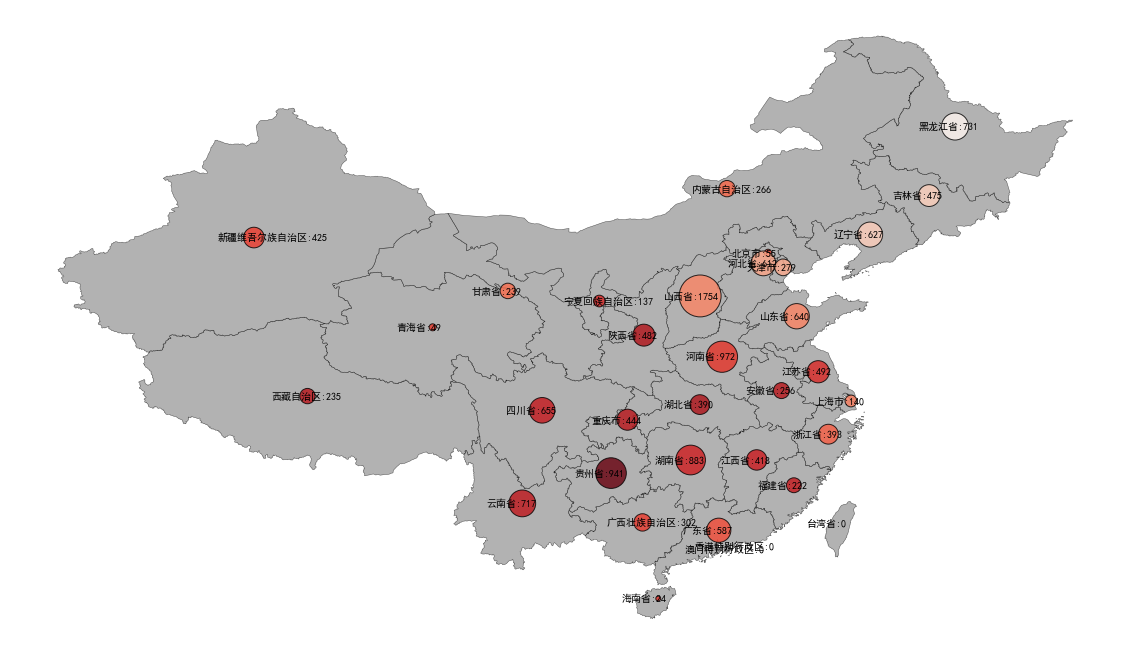

In [15]:
plt.figure(figsize=(20,20))

# 绘制底图
data.plot(ax=plt.subplot(1,1,1),scheme = 'FisherJenks',
                  edgecolor='k', linewidth = 0.5, color = 'gray', alpha = 0.6)

# 添加气泡图
plt.scatter(data['centerlng']+0.2,data['centerlat']+0.2,c = data['rate'],cmap = 'Reds',
            s = data['death'], edgecolors='k', alpha = 0.8)

# 设置网格线
plt.grid(True,alpha=0.5)

# 添加省市信息
lst = data[['name','centerlng','centerlat','death']].to_dict(orient = 'record')
for i in lst:
    plt.text(i['centerlng']-2, i['centerlat'], i['name'] +':' + str(i['death']))
plt.axis('off')
plt.savefig(r'C:\Users\86177\Desktop\2005-2019年安全事故统计论文\img\8.png',dpi = 200)

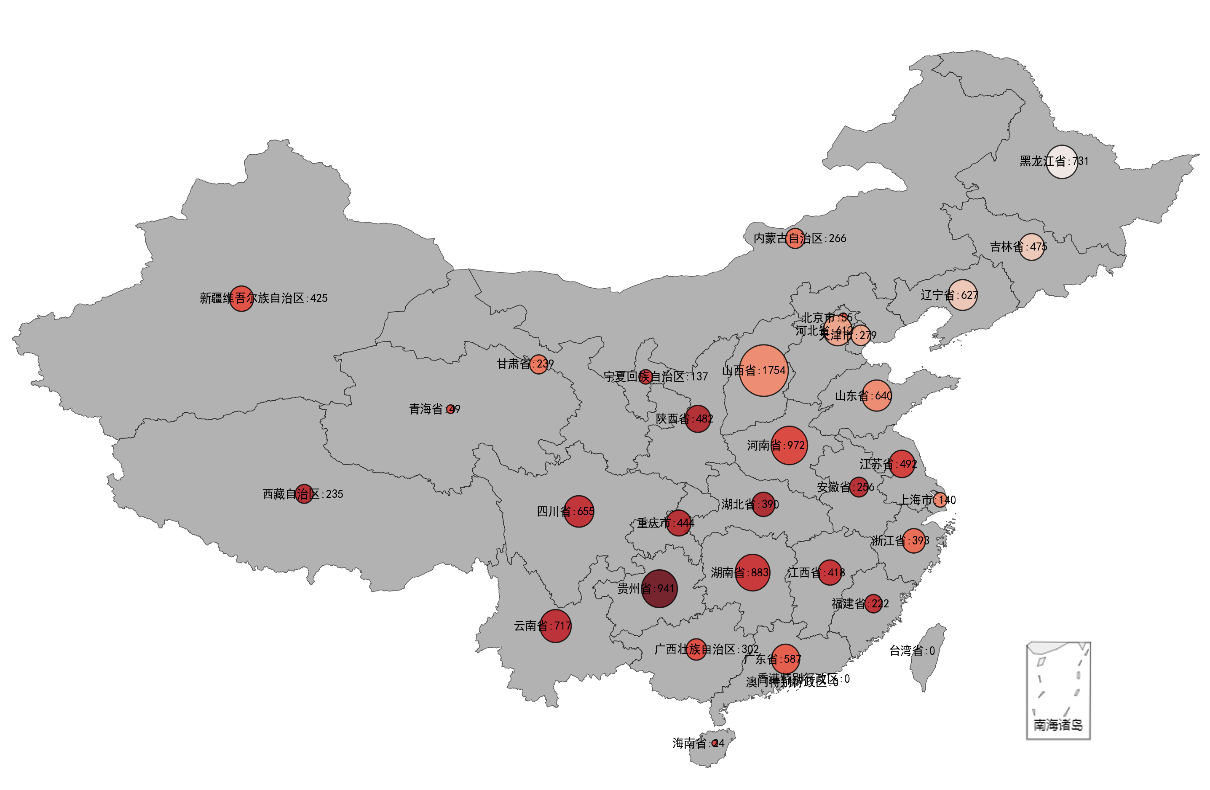

In [18]:
#为了规范地图，加上南海有关的版图
from IPython.display import Image
Image(filename = r"C:\Users\86177\Desktop\2005-2019年安全事故统计论文\img\8.png", width=800, height=400)

In [78]:
#标准化后查看一下有没有关系

data_relative = data[['地区','death','rate']]
data_relative.dropna(inplace = True)
data_relative['地区'] = data_relative['地区'].apply(lambda x :x.replace('省','').replace('市','').replace('自治区','').replace('回族','').replace('壮族','').replace('维吾尔族',''))
data_relative['death_norm'] = (data_relative['death'] - data_relative['death'].min())/(data_relative['death'].max() - data_relative['death'].min())
data_relative['rate_norm'] = (data_relative['rate'] - data_relative['rate'].min())/(data_relative['rate'].max() - data_relative['rate'].min())
data_relative.set_index('地区',inplace = True)
data_relative.sort_values(by = 'rate',ascending = False)

,death,rate,death_norm,rate_norm
地区,,,,
贵州,941,0.1328,0.530058,1.000000
湖北,390,0.1214,0.211561,0.845109
陕西,482,0.1205,0.264740,0.832880
西藏,235,0.1191,0.121965,0.813859
重庆,444,0.1190,0.242775,0.812500
安徽,256,0.1189,0.134104,0.811141
云南,717,0.1171,0.400578,0.786685
福建,222,0.1162,0.114451,0.774457
四川,655,0.1156,0.364740,0.766304


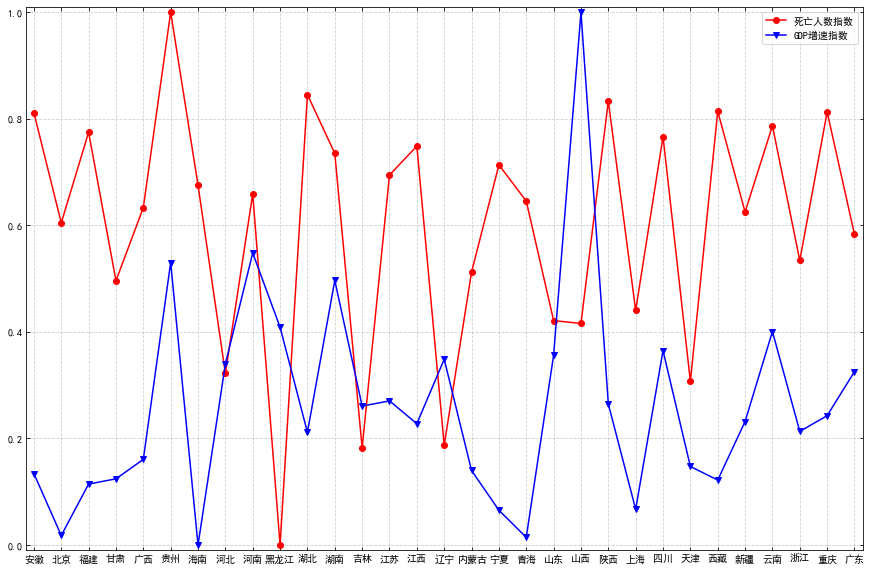

In [75]:
plt.figure(figsize=(15,10))

plt.plot(data_relative.index,data_relative.rate_norm,color = 'r',marker = 'o',label= '死亡人数指数')
plt.plot(data_relative.index,data_relative.death_norm,color = 'b',marker = 'v',label= 'GDP增速指数')
plt.legend()
plt.margins(0.01)